In [284]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False

In [337]:
# imdb데이터 불러오기
# 단어사전은 500개까지만 가져옴.
# 원핫인코딩하면 500개 컬럼이 만들어짐.
(train_input,train_target),(test_input,test_target) = keras.datasets.imdb.load_data(
    num_words = 500
)

In [286]:
print(train_input.shape,test_input.shape)

(25000,) (25000,)


In [287]:
# 1 : 토큰 시작
# 2 : 단어사전에 없는 단어들
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [288]:
# 2진분류 : 긍정 1, 부정 0
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [338]:
from sklearn.model_selection import train_test_split
train_input,val_input,train_target,val_target = train_test_split(train_input,train_target,test_size=0.2,random_state=42)

In [290]:
print(train_input.shape,val_input.shape)

(20000,) (5000,)


In [291]:
len(train_input[4])

559

In [292]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [293]:
lengths

array([259, 520, 290, ..., 300,  70,  77])

In [294]:
print(np.mean(lengths) ,np.median(lengths))
print(np.max(lengths))

239.00925 178.0
1854


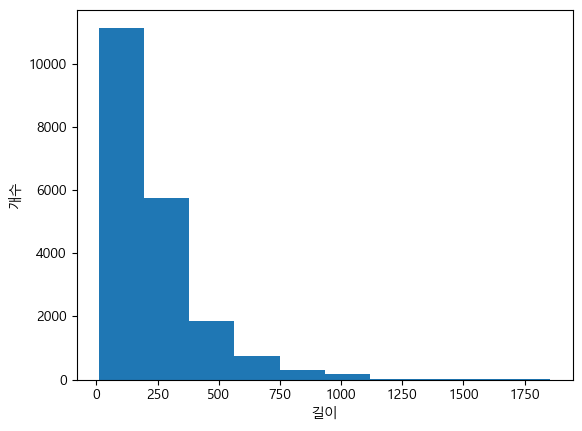

In [295]:
plt.hist(lengths)
plt.xlabel('길이')
plt.ylabel('개수')
plt.show()

In [342]:
# sequence 패딩
# 글자 수 제한. 없는 부분은 0으로 채움
# 최대 글자 수 100개로 제한
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input,maxlen=100)
val_seq = pad_sequences(val_input,maxlen=100)


In [345]:
# 20000 샘플, 크디
train_seq.shape
val_seq.shape
# oh = keras.utils.to_categorical(train_seq)

(5000, 100)

In [298]:
# 시퀀스 패딩 적용해서 0이 없으면 글자 잘린 것임.
# 시퀀스 패딩은 100개 이상의 글자를 자를 때, 앞부분을 자름.(뒤 내용이 더 주요하다 판단)
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [299]:
# 시퀀스 패딩은 100개 이상의 글자를 자를 때, 앞부분을 자름.(뒤 내용이 더 주요하다 판단)
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [300]:
# 6번째 샘플 : 앞부분 0으로 채워져 있음
# 100개 단어보다 적은 데이터
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [301]:
# 검증세트 - 시퀀스패딩
# val_seq = pad_sequences(val_input,maxlen=100)


In [309]:
train_seq.shape

(20000, 100)

In [303]:
# 순환 신경망 모델 구현
model = keras.Sequential()
# 순환 신경망 알고리즘
# 시퀀스패딩 : 크기100 , 단어사전500  제한
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
# 이진분류
model.add(keras.layers.Dense(1,activation='sigmoid'))


c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [306]:
# fit 훈련 데이터 3차원 행렬
train_oh = keras.utils.to_categorical(train_seq)

MemoryError: Unable to allocate 7.45 GiB for an array with shape (2000000, 500) and data type float64

In [305]:
# 원핫인코딩
train_oh = keras.utils.to_categorical(train_seq)
len(train_target)
len(train_seq)

MemoryError: Unable to allocate 7.45 GiB for an array with shape (2000000, 500) and data type float64

In [ ]:
len(train_oh)

20000

In [ ]:
# val_seq
val_oh = keras.utils.to_categorical(val_seq)
len(val_target)
len(val_oh)

5000

In [ ]:
#### RNN 순환신경망
## 데이터 전처리
# train_seq = pad_sequences(train_input,maxlen=100)

# # ## 모델결정 
# model = keras.Sequential()
# # # 순환 신경망 알고리즘
# # # 시퀀스패딩 : 크기100 , 단어사전500  제한
# model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
# # # 이진분류
# model.add(keras.layers.Dense(1,activation='sigmoid'))

# train_oh = keras.utils.to_categorical(train_seq)
# model.summary()

# rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
# ## 모델설정        
# model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
# ## 모델체크포인트   
# checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRnn_model.keras')
# ## 조기종료        
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
# ## 훈련(히스토리)   
# history = model.fit(train_oh,train_target,batch_size=64,epochs=100,validation_data=(val_oh,val_target),callbacks=[checkpoint_cb,early_stopping_cb])
# ## 모델평가        
# # model.evaluate(val_oh,val_target)



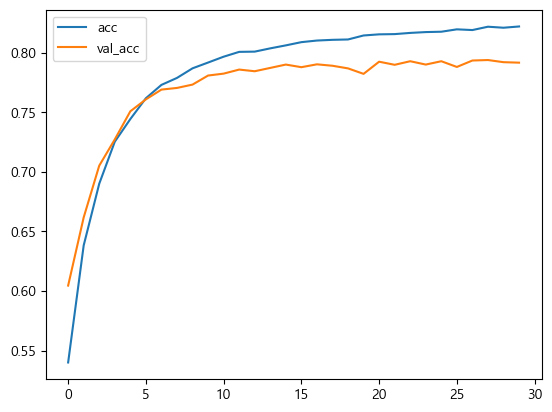

In [ ]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.legend(['acc','val_acc'])

In [ ]:
# early_stopping_cb.stopped_epoch

In [ ]:
# rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
# model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
# checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRnn_model.keras')
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True )
# history = model.fit(train_oh,train_target,batch_size=64,epochs=100,
#                 validation_data=(val_oh,val_target),
#                 callbacks=[checkpoint_cb,early_stopping_cb])

In [ ]:
# model.evaluate(val_oh,val_target)

ValueError: You must call `compile()` before using the model.

In [325]:
train_input2,val_input2,train_target2,val_target2 = train_test_split(test_input,test_target,test_size=0.2,random_state=42)

In [332]:
train_seq2 = pad_sequences(train_input2,maxlen=100)
val_seq2 = pad_sequences(val_input2,maxlen=100)
len(train_seq2)
len(val_seq2)
# len(train_target2)
# len(val_target2)
# train_oh2 = keras.utils.to_categorical(train_seq2)
# val_oh2 = keras.utils.to_categorical(val_seq2)

5000

In [ ]:
#### RNN 순환신경망
## 데이터 전처리
# train_seq2 = pad_sequences(train_input2,maxlen=100)
# val_seq2 = pad_sequences(val_input2,maxlen=100)

# ## 모델결정 
model = keras.Sequential()
# # 순환 신경망 알고리즘
# # 시퀀스패딩 : 크기100 , 단어사전500  제한
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
# # 이진분류
model.add(keras.layers.Dense(1,activation='sigmoid'))

# train_oh2 = keras.utils.to_categorical(train_seq2)
model.summary()

rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
## 모델설정        
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
## 모델체크포인트   
checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRnn_model.keras')
## 조기종료        
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
## 훈련(히스토리)   
history = model.fit(train_oh2,train_target,batch_size=64,epochs=100,validation_data=(val_oh2,val_target),callbacks=[checkpoint_cb,early_stopping_cb])
## 모델평가        
# model.evaluate(val_oh,val_target)



Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_15 (SimpleRNN)       │ (None, 8)              │         4,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,081 (15.94 KB)

 Trainable params: 4,081 (15.94 KB)

 Non-trainable params: 0 (0.00 B)

MemoryError: Unable to allocate 3.73 GiB for an array with shape (20000, 100, 500) and data type float32

단어 임베딩

In [312]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
model2.add(keras.layers.Dense(1,activation='sigmoid'))
model2.summary()

c:\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_22 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [334]:
train_input,val_input,train_target,val_target = train_test_split(train_input,train_target,test_size=0.2,random_state=42)
train_seq = pad_sequences(train_input2,maxlen=100)
val_seq = pad_sequences(val_input2,maxlen=100)
train_seq.shape
train_target.shape
val_seq.shape
val_target.shape

(3200,)

In [335]:

rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
## 모델설정        
model2.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
## 모델체크포인트   
checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRnn_embedding_model.keras')
## 조기종료        
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
## 훈련(히스토리)   
history = model2.fit(train_seq,train_target,batch_size=64,epochs=100,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 20000
'y' sizes: 12800
